# Import Library and Dataset

In [1]:
# import library dan data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df_aids = pd.read_csv("AIDS_train.csv")
df_aids

,id,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,label
0,9,188,0,35,78.0192,0,1,0,100,0,...,1,3,0,0,1,221,132,221,759,1
1,322,799,2,35,87.9984,0,1,0,100,0,...,0,1,0,1,1,262,305,1696,1301,0
2,704,646,1,35,77.5000,0,1,0,90,0,...,1,3,1,1,0,280,265,1703,1020,1
3,77,771,2,25,71.3000,0,1,0,100,0,...,0,1,0,1,1,310,400,610,630,0
4,1526,1006,1,30,69.4008,0,1,0,100,0,...,0,1,0,1,0,659,511,1392,876,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1813,1033,638,3,38,76.2048,0,1,0,100,0,...,0,1,0,1,1,199,295,707,900,0
1814,1731,813,1,24,68.4936,0,1,0,100,0,...,0,1,1,1,1,406,384,672,612,1
1815,763,827,0,65,60.5000,0,1,0,90,0,...,0,1,0,0,1,414,459,2016,1507,1
1816,835,983,2,41,75.5000,0,1,0,90,0,...,1,2,0,1,0,362,293,1156,738,0


In [3]:
df_aids.describe()

,id,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,label
count,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,...,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.000000,1818.00000,1818.000000,1818.000000
mean,1071.201320,879.564356,1.513751,35.280528,75.205883,0.084708,0.659516,0.135864,95.434543,0.020902,...,0.584708,1.985149,0.174917,0.747525,0.359736,349.636964,370.500000,991.29978,939.009901,0.239824
std,617.612441,292.749176,1.130007,8.782799,13.523368,0.278524,0.474002,0.342738,5.985982,0.143096,...,0.492908,0.903305,0.380001,0.434552,0.480055,118.451243,144.454796,486.14056,452.550833,0.427093
min,0.000000,14.000000,0.000000,12.000000,31.000000,0.000000,0.000000,0.000000,70.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,50.000000,40.00000,124.000000,0.000000
25%,543.250000,726.000000,0.000000,29.000000,66.679200,0.000000,0.000000,0.000000,90.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,261.250000,267.000000,655.00000,628.250000,0.000000
50%,1070.500000,999.000000,2.000000,34.000000,74.390400,0.000000,1.000000,0.000000,100.000000,0.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,340.000000,352.000000,894.00000,870.500000,0.000000
75%,1601.750000,1091.000000,3.000000,40.000000,82.555200,0.000000,1.000000,0.000000,100.000000,0.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,423.000000,459.000000,1210.00000,1149.750000,0.000000
max,2137.000000,1231.000000,3.000000,70.000000,159.939360,1.000000,1.000000,1.000000,100.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,1199.000000,1119.000000,5011.00000,6035.000000,1.000000


In [4]:
df_aids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 25 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1818 non-null   int64  
 1   time     1818 non-null   int64  
 2   trt      1818 non-null   int64  
 3   age      1818 non-null   int64  
 4   wtkg     1818 non-null   float64
 5   hemo     1818 non-null   int64  
 6   homo     1818 non-null   int64  
 7   drugs    1818 non-null   int64  
 8   karnof   1818 non-null   int64  
 9   oprior   1818 non-null   int64  
 10  z30      1818 non-null   int64  
 11  zprior   1818 non-null   int64  
 12  preanti  1818 non-null   int64  
 13  race     1818 non-null   int64  
 14  gender   1818 non-null   int64  
 15  str2     1818 non-null   int64  
 16  strat    1818 non-null   int64  
 17  symptom  1818 non-null   int64  
 18  treat    1818 non-null   int64  
 19  offtrt   1818 non-null   int64  
 20  cd40     1818 non-null   int64  
 21  cd420    1818 

In [5]:
df_aids = df_aids.drop('id', axis=1)

# Data Distribution

## Categorical Variables

In [6]:
# Unique values for categorical variables
categorical_columns = ['trt', 'hemo', 'homo', 'oprior', 'z30', 'zprior', 'drugs', 'karnof', 'race', 'gender', 'str2', 'symptom', 'strat', 'treat', 'offtrt']
for col in categorical_columns:
    print(f"\n{col} value counts:")
    print(df_aids[col].value_counts())


trt value counts:
trt
3    474
0    459
2    445
1    440
Name: count, dtype: int64

hemo value counts:
hemo
0    1664
1     154
Name: count, dtype: int64

homo value counts:
homo
1    1199
0     619
Name: count, dtype: int64

oprior value counts:
oprior
0    1780
1      38
Name: count, dtype: int64

z30 value counts:
z30
1    998
0    820
Name: count, dtype: int64

zprior value counts:
zprior
1    1818
Name: count, dtype: int64

drugs value counts:
drugs
0    1571
1     247
Name: count, dtype: int64

karnof value counts:
karnof
100    1079
90      657
80       73
70        9
Name: count, dtype: int64

race value counts:
race
0    1287
1     531
Name: count, dtype: int64

gender value counts:
gender
1    1505
0     313
Name: count, dtype: int64

str2 value counts:
str2
1    1063
0     755
Name: count, dtype: int64

symptom value counts:
symptom
0    1500
1     318
Name: count, dtype: int64

strat value counts:
strat
1    755
3    728
2    335
Name: count, dtype: int64

treat value cou

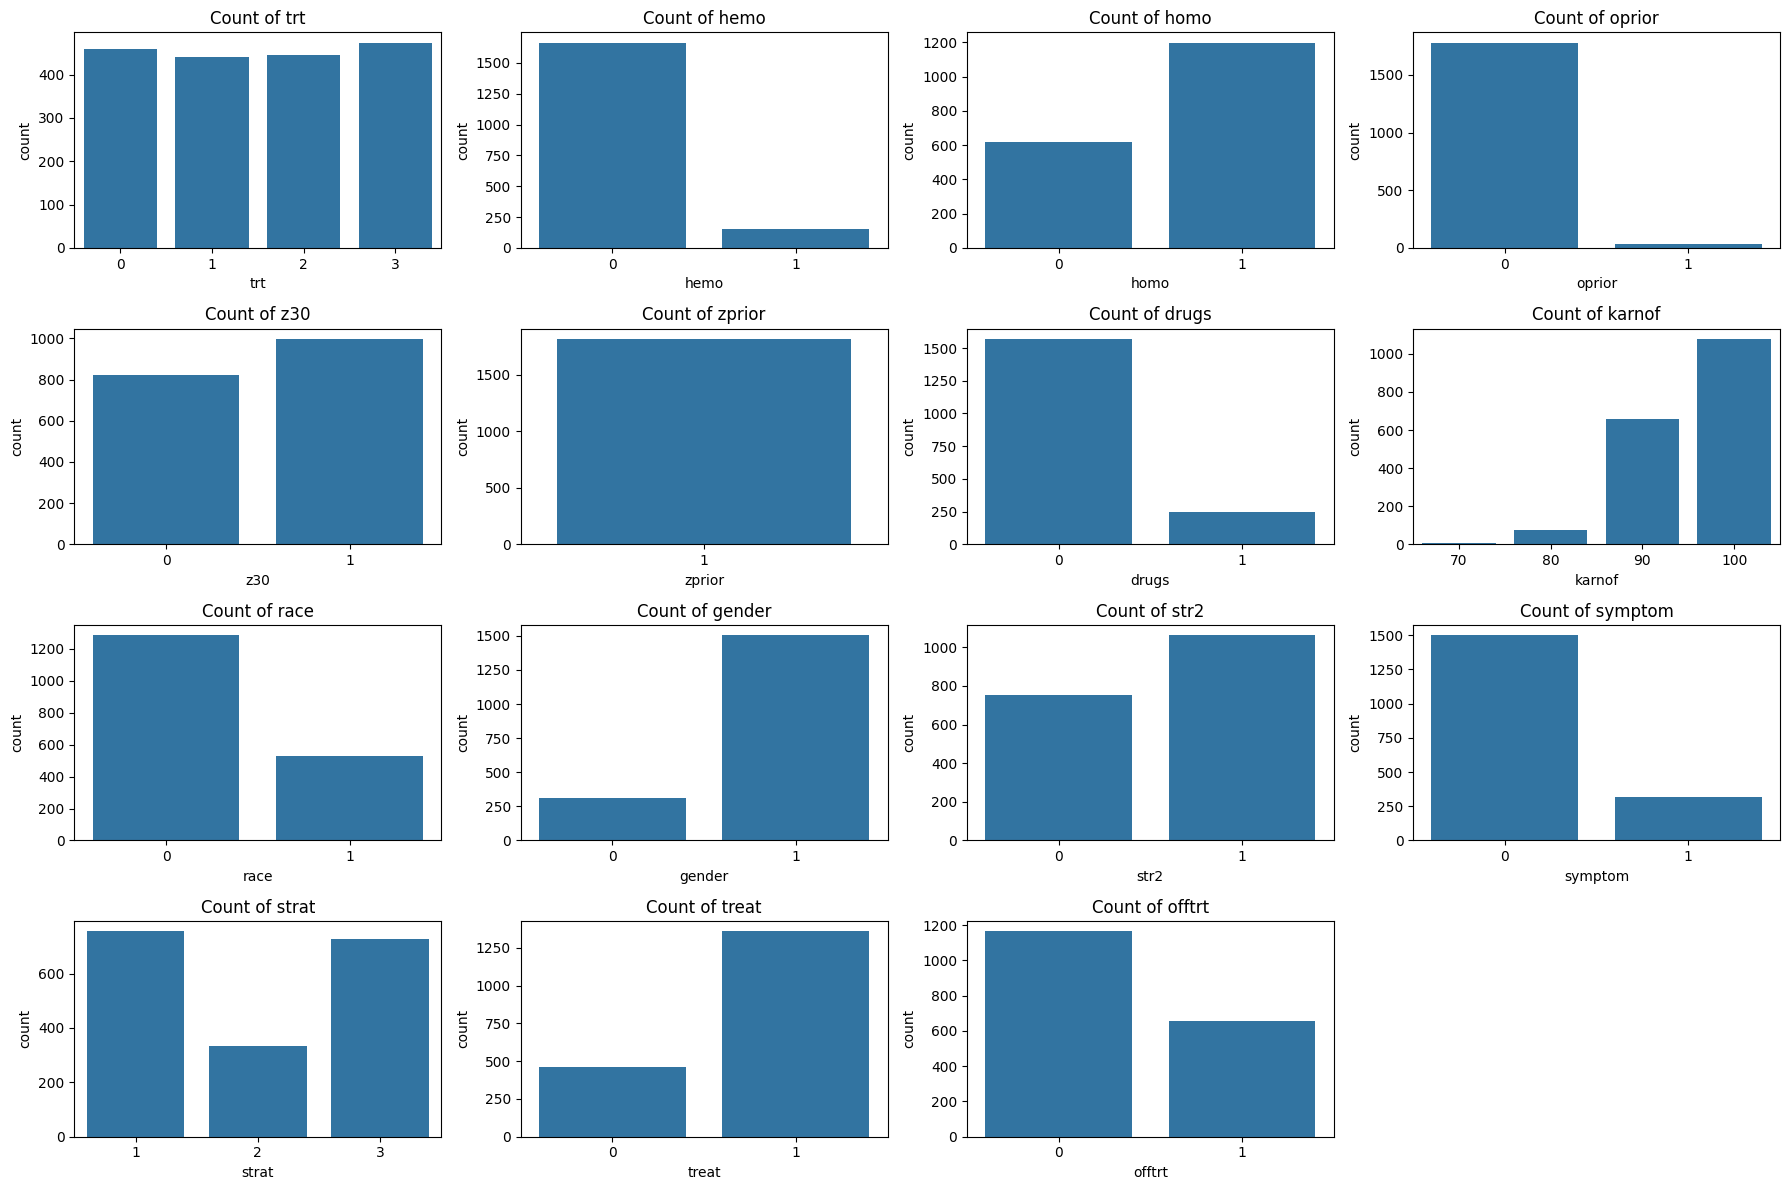

In [7]:
# Countplots
plt.figure(figsize=(18, 12))

for i, var in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=df_aids[var], data=df_aids)
    plt.title(f'Count of {var}')

plt.tight_layout()
plt.show()

**Analysis**
- `Treatment Group (trt)`: Distribution across treatment groups is relatively balanced.
- `Hemo` : Most participants do not suffer from haemophilia.
- `Homo` : More participants engaged in homosexual activity.
- `Drugs`: Most participants do not consume IV drug.
- `Karnofsky Score (karnof)`: Most participants have a high Karnofsky score, indicating good health performance.
- `Symptom`: The majority of participants do not show symptoms.
- `Oprior`: Most participants have not had non-ZDV antiretroviral therapy.
- `z30`: The distribution shows there are more participants had ZDV in the 30 days before the study.
- `zprior` : All participants had ZDV before the study.
- `Race`: Most participants belong to white people category.
- `Gender`: Gender distribution shows a higher count in male.
- `Treatment History (str2, strat)`: Showing different distributions across the dataset.
- `Treatment Indicator (treat)`: Majority of participants received other treatment.
- `Off Treatment (offtrt)`: Participants are currently undergoing treatment, but some are off treatment.

## Numeric (Continuous) Variables

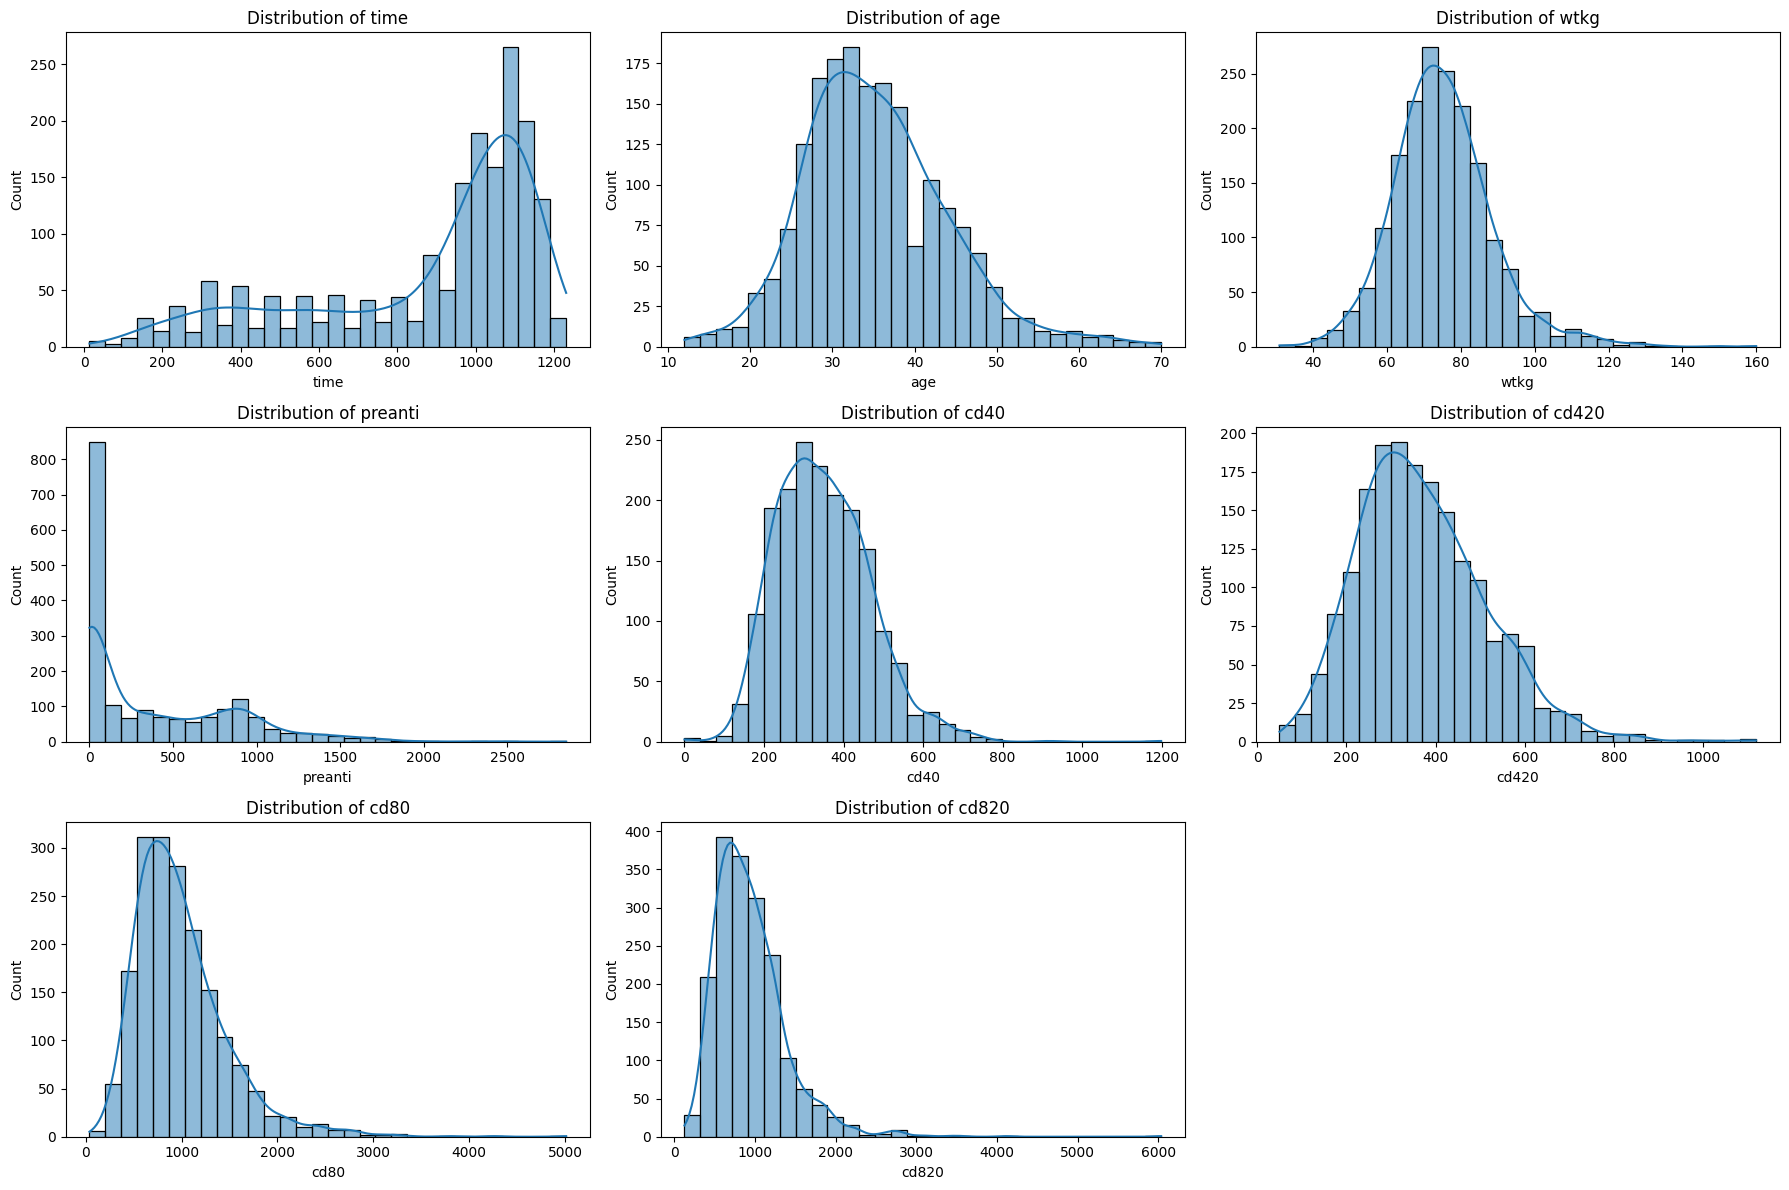

In [8]:
# Unique Values for numeric variables
numeric_columns = ['time', 'age', 'wtkg', 'preanti', 'cd40', 'cd420', 'cd80', 'cd820']

plt.figure(figsize=(18, 12))

for i, var in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df_aids[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

**Insight**

- `Age`: The age distribution appears to be slightly right-skewed means the most participants are in the lower age range.
- `Weight (wtkg)`: The weight distribution is relatively normal but with a possible slight skew.
- `Prior Antiviral Treatment (preanti)` : MOst participants do not received prior anti-retroviral treatment.
- `CD4 Counts (cd40, cd420)`: These have a relatively normal distribution, though thee are a few extreme values (potential outliers).
- `CD8 Counts (cd80, cd820)`: The distribution suggests that most participants fall within a typical range showing a right skewed.

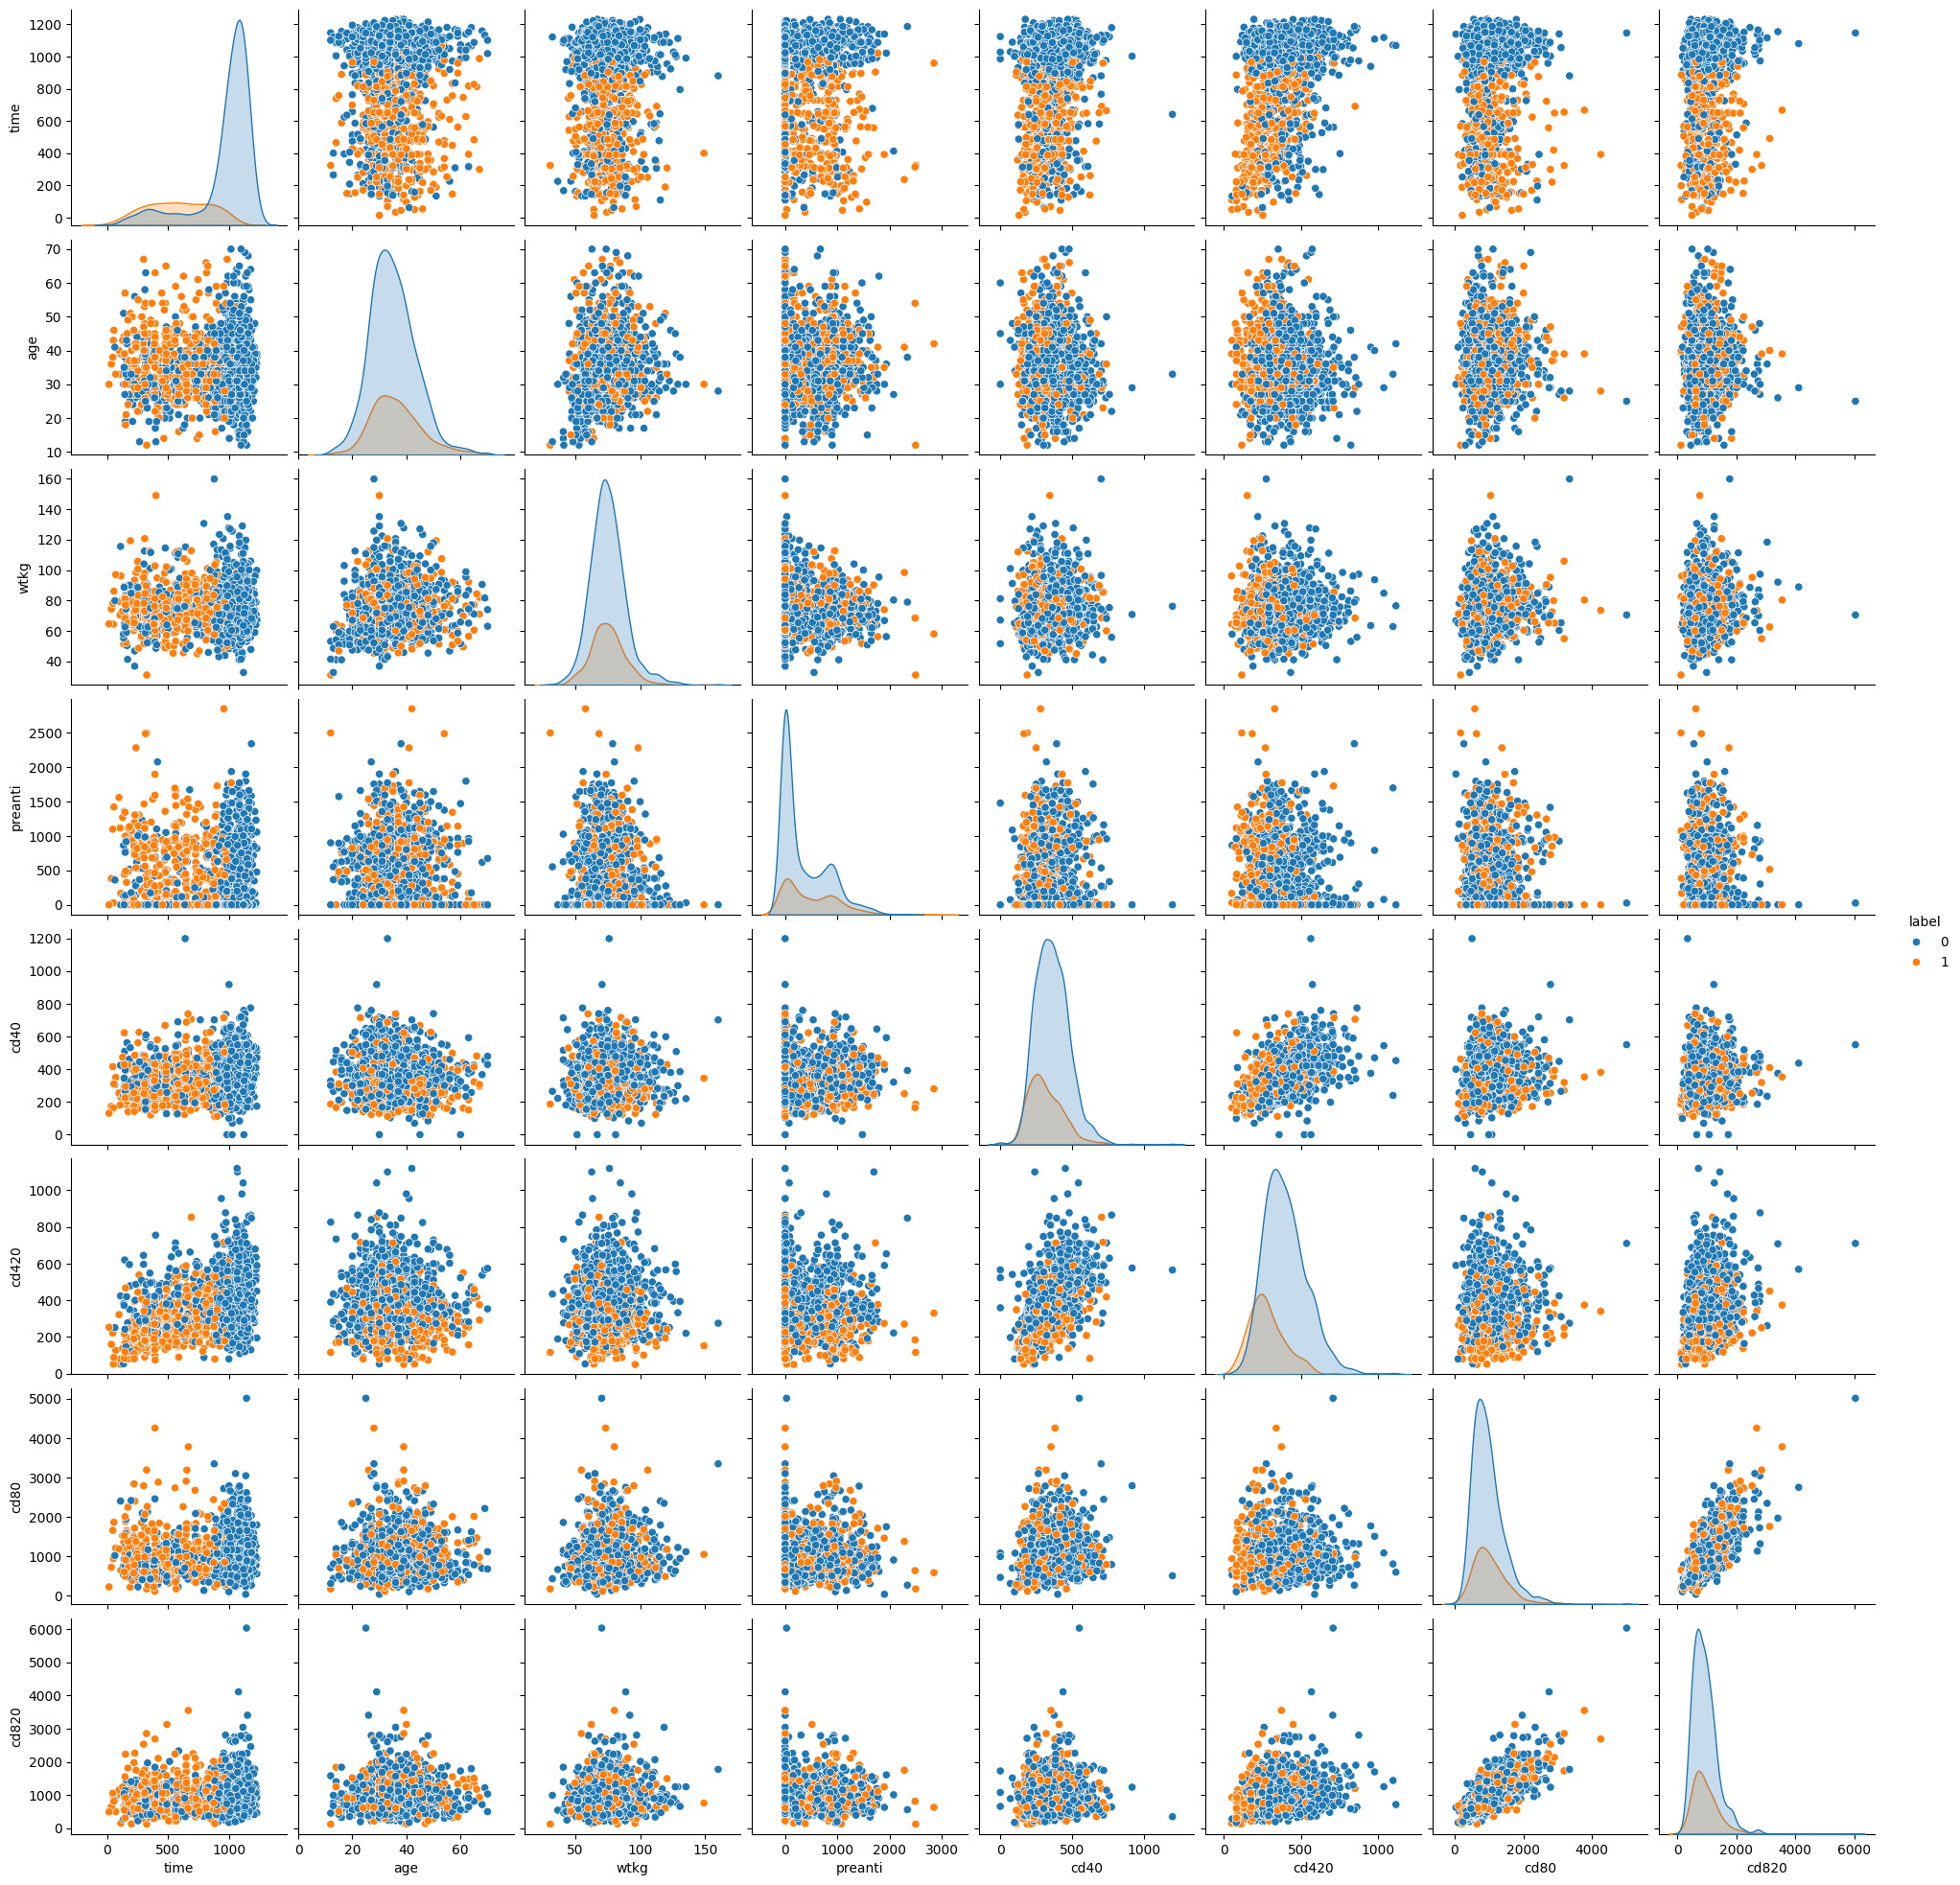

In [9]:
# Pair plot for numeric variables
sns.pairplot(df_aids[numeric_columns + ['label']], hue='label', diag_kind='kde')
plt.show()

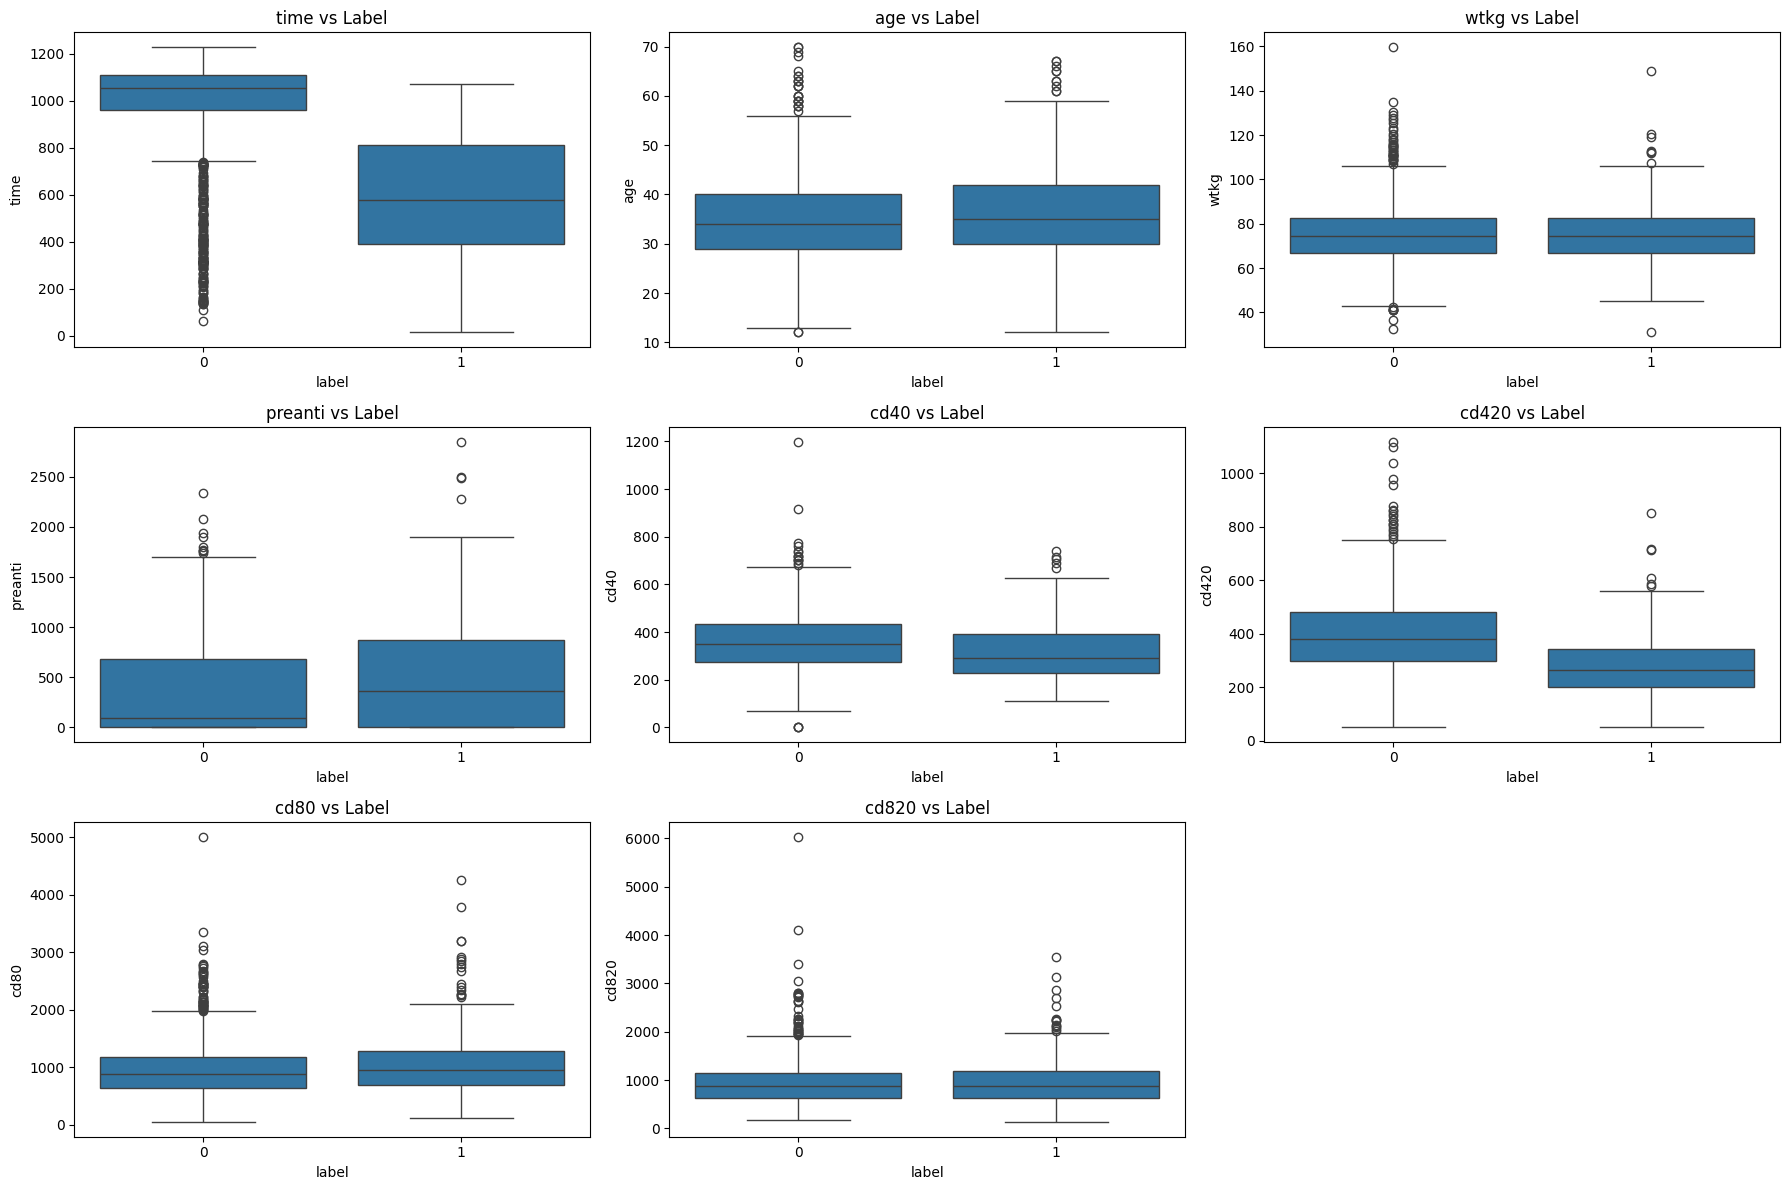

In [10]:
# Boxplot for numeric variables
plt.figure(figsize=(18, 12))

for i, var in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_aids['label'], y=df_aids[var])
    plt.title(f'{var} vs Label')

plt.tight_layout()
plt.show()

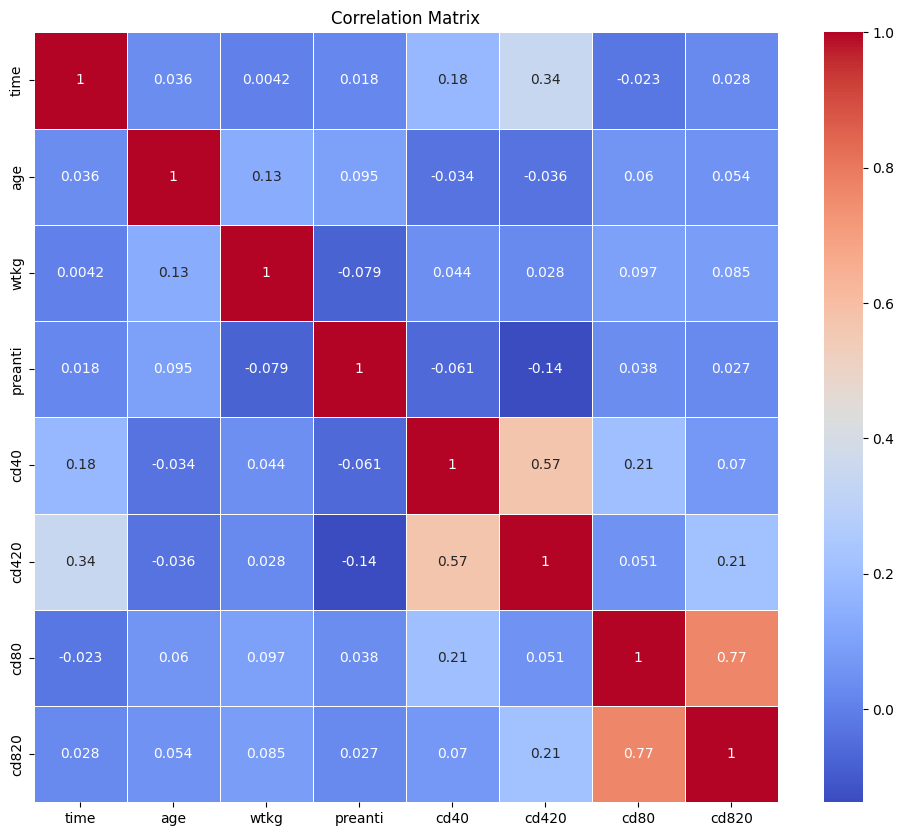

In [11]:
# Correlation matrix with heatmap
corr_matrix = df_aids[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Preprocessing

In [12]:
df_aids.head(5)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,label
0,188,0,35,78.0192,0,1,0,100,0,1,...,1,3,0,0,1,221,132,221,759,1
1,799,2,35,87.9984,0,1,0,100,0,0,...,0,1,0,1,1,262,305,1696,1301,0
2,646,1,35,77.5000,0,1,0,90,0,1,...,1,3,1,1,0,280,265,1703,1020,1
3,771,2,25,71.3000,0,1,0,100,0,0,...,0,1,0,1,1,310,400,610,630,0
4,1006,1,30,69.4008,0,1,0,100,0,0,...,0,1,0,1,0,659,511,1392,876,0


## Null Values

In [13]:
# Checking null values
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na*100 / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("No missing values found in the dataset")

    else:
        print(missing_data[missing_data['Total'] > 0])

In [14]:
cek_null(df_aids)

No missing values found in the dataset


## Data Duplicate

In [15]:
# Check for duplicate data
print("Number of data duplications : " + str(df_aids.duplicated().sum()))

Number of data duplications : 0


## Outliers

In [16]:
def detect_outliers(df, numeric_columns):
    outlier_info = []
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        num_outliers = outliers.shape[0]
        percentage = (num_outliers / df.shape[0]) * 100
        outlier_info.append({
            'Feature': col,
            'Lower Bound': lower_bound,
            'Upper Bound': upper_bound,
            'Number of Outliers': num_outliers,
            'Percentage of Outliers': percentage
        })
    return pd.DataFrame(outlier_info)

In [17]:
outlier = detect_outliers(df_aids, numeric_columns)
print(outlier)

   Feature  Lower Bound  Upper Bound  Number of Outliers  \
0     time     178.5000    1638.5000                  40   
1      age      12.5000      56.5000                  44   
2     wtkg      42.8652     106.3692                  54   
3  preanti   -1125.7500    1876.2500                   9   
4     cd40      18.6250     665.6250                  24   
5    cd420     -21.0000     747.0000                  24   
6     cd80    -177.5000    2042.5000                  66   
7    cd820    -154.0000    1932.0000                  50   

   Percentage of Outliers  
0                2.200220  
1                2.420242  
2                2.970297  
3                0.495050  
4                1.320132  
5                1.320132  
6                3.630363  
7                2.750275  


In [18]:
# Remove outliers
Q1 = df_aids[numeric_columns].quantile(0.25)
Q3 = df_aids[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
df_aids = df_aids[~((df_aids[numeric_columns] < (Q1 - 1.5 * IQR)) | (df_aids[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_aids.dropna(inplace=True)

## Encoding and Scaling

In [ ]:
df_processed = df_aids.copy()

In [ ]:
# Encode categorical features

# Categorizing Karnofsky Score
df_processed['karnof_category'] = pd.cut(df_processed['karnof'], bins=[0, 50, 70, 100], labels=['Low', 'Medium', 'High'])

# Ordinal encoding for Karnofsky score categories
ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df_processed['karnof_encoded'] = ordinal_encoder.fit_transform(df_processed[['karnof_category']])

In [ ]:
# Separate features and target
X_reg = df_processed.drop(columns=['time', 'karnof_category', 'karnof'])
y_reg = df_processed['time']

In [ ]:
# Split the dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [ ]:
# Scale numerical features
scaler = MinMaxScaler()

# Apply scaling to the training set
X_train_scaled = scaler.fit_transform(X_train_reg)

# Apply the same scaling to the test set
X_test_scaled = scaler.transform(X_test_reg)

# Regression

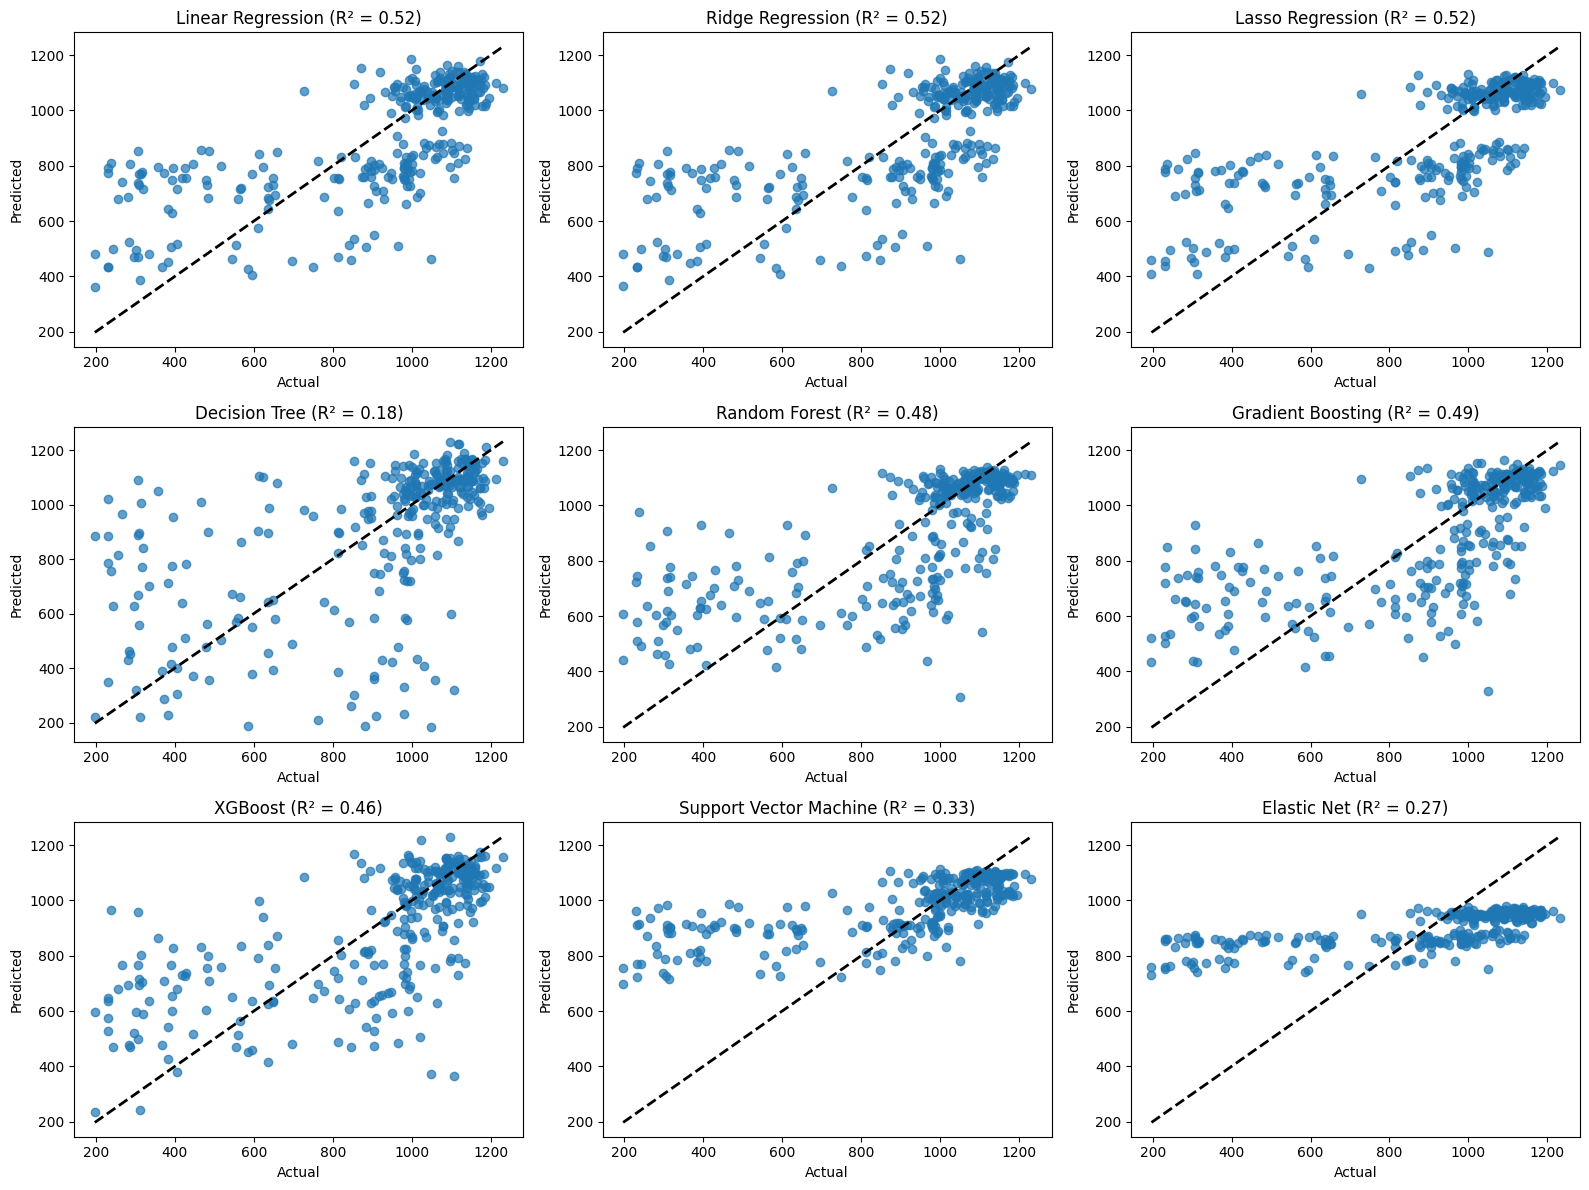

                    Model           MSE        RMSE         MAE        R²
0       Linear Regression  36417.497742  190.833691  141.677659  0.516726
1        Ridge Regression  36366.902818  190.701082  141.624730  0.517398
2        Lasso Regression  35925.848048  189.541151  140.694115  0.523251
3           Decision Tree  61910.365385  248.817936  161.307692  0.178426
4           Random Forest  38887.904214  197.200163  142.482051  0.483943
5       Gradient Boosting  38758.011327  196.870545  143.930197  0.485667
6                 XGBoost  40631.285400  201.572035  145.103717  0.460808
7  Support Vector Machine  50617.938218  224.984307  144.171988  0.328281
8             Elastic Net  55240.719869  235.033444  187.728025  0.266935


In [92]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(alpha=1),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Support Vector Machine': SVR(kernel='linear'),
    'Elastic Net': ElasticNet()
}

# Train each model and evaluate performance
performance_metrics = []

plt.figure(figsize=(16, 12))  # Set up the figure for the subplots

for i, (model_name, model) in enumerate(models.items()):
# for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train_reg)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test_reg, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_reg, y_pred)
    r2 = r2_score(y_test_reg, y_pred)
    
    # Store results in a list
    performance_metrics.append({
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2
    })

    # Plot actual vs predicted values
    plt.subplot(3, 3, i + 1)  # Create a subplot for each model
    plt.scatter(y_test_reg, y_pred, alpha=0.7)
    plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)  # Line of perfect prediction
    plt.title(f'{model_name} (R² = {r2:.2f})')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.tight_layout()  # Adjust subplot spacing

# Show the combined plot
plt.show()

# Convert results to a DataFrame for easy comparison
performance_df = pd.DataFrame(performance_metrics)
print(performance_df)

Interpretation of Metrics:
- Mean Squared Error (MSE): MSE measures the average of the squared differences between the actual values (true values) and the predicted values. It gives more weight to larger errors since the errors are squared. Lower is better. It gives more weight to larger errors.
- Root Mean Squared Error (RMSE): Lower is better. It provides a measure of how much error you can expect between the predicted and actual values, in the same units as the target variable.
- Mean Absolute Error (MAE): MAE calculates the average of the absolute differences between the predicted and actual values. Lower is better. It’s less sensitive to outliers than MSE or RMSE.
- R-squared (R²): Represents the proportion of the variance in the target variable that is explained by the model. Higher is better. It indicates how well the model explains the variance in the target variable. An R² closer to 1 is ideal.

Based on the evaluation metrics, Lasso Regression has the best R² value of 0.5232 (52.32%), indicating that it explains the most variance in the target variable. It also has the lowest MSE (35925.85) indicating that it has the smallest average error in predicting time, RMSE (189.54), and MAE (140.69) indicating it performs well in terms of minimizing absolute prediction errors among the linear models.

1. R² of 0.523:
    - This means that the Lasso model explains 52.3% of the variance in the target variable (time). In other words, just over half of the variability in the predicted time can be explained by the features in the dataset. 
2. RMSE = 189.54:
    - This means that, on average, the model’s predictions are off by about 189.54 days. This error is the square root of the mean squared difference between predicted and actual values.
3. MAE = 140.69: 
    - On average, the model's predictions are off by around 140.69 days. This is a direct measure of the average absolute difference between predicted and actual survival times. It's often considered more interpretable than RMSE because it's not affected by outliers to the same degree.